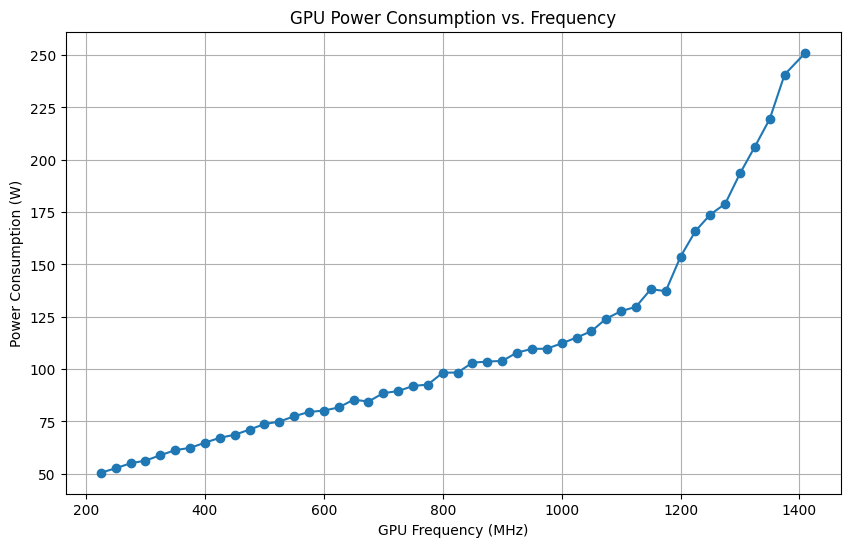

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
csv_file = "./power_frequency/gpu_power_freq_log.csv"
df = pd.read_csv(csv_file)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["Frequency (MHz)"], df["Max Power (W)"], marker='o', linestyle='-', markersize=6)

# Labels and title
plt.xlabel("GPU Frequency (MHz)")
plt.ylabel("Power Consumption (W)")
plt.title("GPU Power Consumption vs. Frequency")
plt.grid(True)

# Show the plot
plt.show()

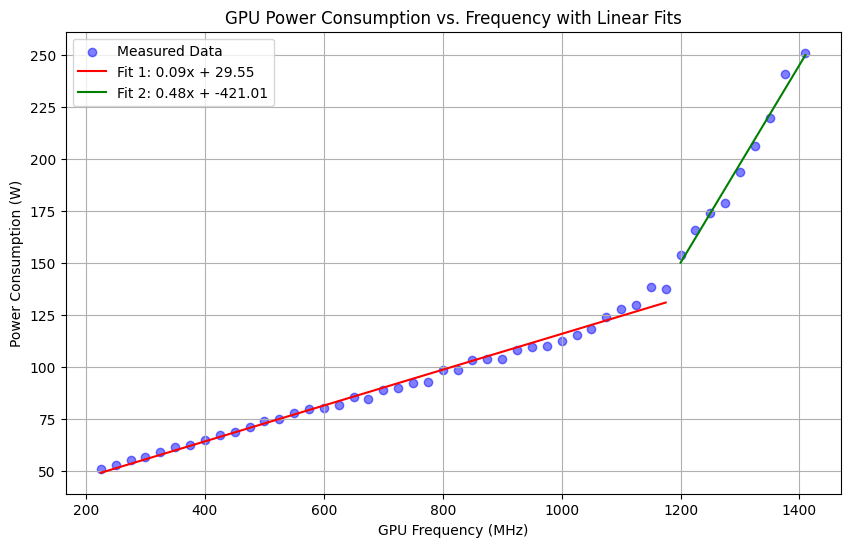

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the uploaded CSV file
file_path = "./power_frequency/gpu_power_freq_log.csv"
df = pd.read_csv(file_path)

# Ensure proper column names (checking the first few rows)
df.columns = df.columns.str.strip()  # Remove any whitespace from column names

# Check column names and rename if necessary
if "Frequency (MHz)" not in df.columns or "Max Power (W)" not in df.columns:
    df.rename(columns={df.columns[0]: "Frequency (MHz)", df.columns[1]: "Max Power (W)"}, inplace=True)

# Extract data for two ranges
df_part1 = df[(df["Frequency (MHz)"] >= 225) & (df["Frequency (MHz)"] <= 1175)]
df_part2 = df[(df["Frequency (MHz)"] >= 1200) & (df["Frequency (MHz)"] <= 1415)]

# Fit linear regression models
def fit_linear_regression(df_part):
    X = df_part["Frequency (MHz)"].values.reshape(-1, 1)
    y = df_part["Max Power (W)"].values
    model = LinearRegression().fit(X, y)
    return model, model.predict(X), model.coef_[0], model.intercept_

model1, y_pred1, slope1, intercept1 = fit_linear_regression(df_part1)
model2, y_pred2, slope2, intercept2 = fit_linear_regression(df_part2)

# Plot the data and the linear fits
plt.figure(figsize=(10, 6))
plt.scatter(df["Frequency (MHz)"], df["Max Power (W)"], label="Measured Data", color="blue", alpha=0.5)
plt.plot(df_part1["Frequency (MHz)"], y_pred1, label=f"Fit 1: {slope1:.2f}x + {intercept1:.2f}", color="red")
plt.plot(df_part2["Frequency (MHz)"], y_pred2, label=f"Fit 2: {slope2:.2f}x + {intercept2:.2f}", color="green")

# Labels and legend
plt.xlabel("GPU Frequency (MHz)")
plt.ylabel("Power Consumption (W)")
plt.title("GPU Power Consumption vs. Frequency with Linear Fits")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [1]:
gpu_caps = [250, 240, 230, 220,210,200,190, 180,170,160,150,140,130,120,110,100,90,80,70,60,50]

def freq_low_range(power):
    """Calculate GPU frequency for power values in the range 225 MHz - 1175 MHz."""
    return int((power - 29.55) / 0.09)

def freq_high_range(power):
    """Calculate GPU frequency for power values in the range 1200 MHz - 1415 MHz."""
    return int((power + 421.01) / 0.48)


gpu_frequencies = [
    freq_low_range(cap) if cap < 150 else freq_high_range(cap)
    for cap in gpu_caps
]